1. **CRUD Operations**
    - Write a program that creates a SQLite database and a table for storing employee information (name, age, position). Perform basic CRUD operations: add, read, update, and delete records.

In [13]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('employees.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Create a table to store employee information
cursor.execute('''CREATE TABLE IF NOT EXISTS employees (
                    id INTEGER PRIMARY KEY,
                    name TEXT NOT NULL,
                    age INTEGER,
                    position TEXT
                )''')
conn.commit()

def add_employee(name, age, position):
    cursor.execute('''INSERT INTO employees (name, age, position) 
                      VALUES (?, ?, ?)''', (name, age, position))
    conn.commit()
    print("Employee added successfully.")

def read_employees():
    cursor.execute('''SELECT * FROM employees''')
    employees = cursor.fetchall()
    for employee in employees:
        print(employee)

def update_employee(employee_id, name=None, age=None, position=None):
    update_fields = []
    if name:
        update_fields.append(('name', name))
    if age:
        update_fields.append(('age', age))
    if position:
        update_fields.append(('position', position))
    
    if not update_fields:
        print("No fields provided for update.")
        return
    
    update_query = ', '.join([f"{field} = ?" for field, _ in update_fields])
    cursor.execute(f'''UPDATE employees SET {update_query} WHERE id = ?''', 
                   [value for _, value in update_fields] + [employee_id])
    conn.commit()
    print("Employee updated successfully.")

def delete_employee(employee_id):
    cursor.execute('''DELETE FROM employees WHERE id = ?''', (employee_id,))
    conn.commit()
    print("Employee deleted successfully.")



In [14]:
# Example usage:
# Add new employees
add_employee('Siddhant Bhattarai', 27, 'Manager')
add_employee('Jane Smith', 25, 'Developer')

Employee added successfully.
Employee added successfully.


In [15]:
# Read all employees
print("All Employees:")
read_employees()

All Employees:
(1, 'Siddhant Bhattarai', 27, 'Manager')
(2, 'Jane Smith', 25, 'Developer')


In [16]:
# Update an employee's information
update_employee(1, position='Senior Manager')

Employee updated successfully.


In [17]:
# Delete an employee
delete_employee(2)

Employee deleted successfully.


In [18]:
# Read all employees after modifications
print("\nAll Employees after modifications:")
read_employees()

# Close the database connection
conn.close()


All Employees after modifications:
(1, 'Siddhant Bhattarai', 27, 'Senior Manager')


2. **Object-Oriented Python**
    - Create a class representing a book with attributes for title, author, and ISBN. Implement methods to display book details and to check if two books are the same based on their ISBN.

In [19]:
class Book:
    def __init__(self, title, author, isbn):
        self.title = title
        self.author = author
        self.isbn = isbn
    
    def display_details(self):
        print(f"Title: {self.title}")
        print(f"Author: {self.author}")
        print(f"ISBN: {self.isbn}")
    
    def __eq__(self, other):
        return isinstance(other, Book) and self.isbn == other.isbn

# Example usage:
book1 = Book("The Great Gatsby", "F. Scott Fitzgerald", "9780141182636")
book2 = Book("To Kill a Mockingbird", "Harper Lee", "9780061120084")

# Display details of book1
print("Details of Book 1:")
book1.display_details()

# Check if two books are the same based on ISBN
if book1 == book2:
    print("These books have the same ISBN.")
else:
    print("These books have different ISBNs.")


Details of Book 1:
Title: The Great Gatsby
Author: F. Scott Fitzgerald
ISBN: 9780141182636
These books have different ISBNs.


3. **Storing Data Across Multiple Tables**
    - Design a database schema with two tables: one for customers and one for orders. Implement a program to add customers and orders, and retrieve orders for a specific customer.

    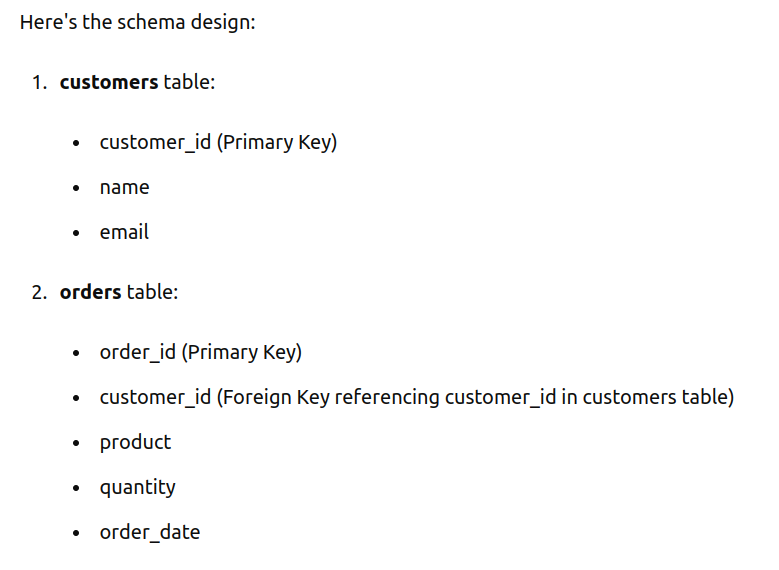

In [31]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('customer_orders.db')
cursor = conn.cursor()

# Create tables if they don't exist
cursor.execute('''CREATE TABLE IF NOT EXISTS customers (
                    customer_id INTEGER PRIMARY KEY,
                    name TEXT NOT NULL,
                    email TEXT NOT NULL UNIQUE
                )''')

cursor.execute('''CREATE TABLE IF NOT EXISTS orders (
                    order_id INTEGER PRIMARY KEY,
                    customer_id INTEGER NOT NULL,
                    product TEXT NOT NULL,
                    quantity INTEGER NOT NULL,
                    order_date DATE NOT NULL,
                    FOREIGN KEY (customer_id) REFERENCES customers (customer_id)
                )''')

conn.commit()

def add_customer(name, email):
    try:
        cursor.execute('''INSERT INTO customers (name, email) VALUES (?, ?)''', (name, email))
        conn.commit()
        print("Customer added successfully.")
    except sqlite3.IntegrityError:
        print("Error: Email already exists.")

def add_order(customer_id, product, quantity, order_date):
    cursor.execute('''INSERT INTO orders (customer_id, product, quantity, order_date) 
                      VALUES (?, ?, ?, ?)''', (customer_id, product, quantity, order_date))
    conn.commit()
    print("Order added successfully.")

def get_orders_for_customer(customer_id):
    cursor.execute('''SELECT * FROM orders WHERE customer_id = ?''', (customer_id,))
    orders = cursor.fetchall()
    if orders:
        for order in orders:
            print(order)
    else:
        print("No orders found for this customer.")


In [32]:
# Example usage:
# Add customers
add_customer('John Doe', 'john@example.com')
add_customer('Jane Smith', 'jane@example.com')

Customer added successfully.
Customer added successfully.


In [33]:
# Add orders
add_order(1, 'Book', 2, '2024-06-01')
add_order(1, 'Phone', 1, '2024-06-03')
add_order(2, 'Laptop', 1, '2024-06-02')

Order added successfully.
Order added successfully.
Order added successfully.


In [34]:
# Retrieve orders for a specific customer
print("\nOrders for John Doe:")
get_orders_for_customer(1)

# Close the database connection
conn.close()


Orders for John Doe:
(1, 1, 'Book', 2, '2024-06-01')
(2, 1, 'Phone', 1, '2024-06-03')


4. **Using Google Maps API**
    - Write a program that takes a list of addresses, retrieves their geographical coordinates using the Google Maps API, and displays them on a map.

- <button style="background-color:#ff9800; color: white; border: none; padding: 10px 24px;">Develop a Contact Management System</button>

  Develop a contact management system where users can add, update, delete, and search for contacts. Each contact should have a name, phone number, email, and address. Use a SQLite database to store the contacts and implement a user-friendly interface for managing them.


In [39]:
import sqlite3
import tkinter as tk
from tkinter import messagebox

class ContactManager:
    def __init__(self, master):
        self.master = master
        self.master.title("Contact Management System")
        
        # Connect to the SQLite database
        self.conn = sqlite3.connect('contacts.db')
        self.cursor = self.conn.cursor()
        
        # Create contacts table if not exists
        self.cursor.execute('''CREATE TABLE IF NOT EXISTS contacts (
                                id INTEGER PRIMARY KEY,
                                name TEXT NOT NULL,
                                phone TEXT NOT NULL,
                                email TEXT,
                                address TEXT
                            )''')
        self.conn.commit()
        
        # Create UI elements
        self.name_label = tk.Label(master, text="Name:")
        self.name_label.grid(row=0, column=0, padx=5, pady=5)
        self.name_entry = tk.Entry(master)
        self.name_entry.grid(row=0, column=1, padx=5, pady=5)
        
        self.phone_label = tk.Label(master, text="Phone:")
        self.phone_label.grid(row=1, column=0, padx=5, pady=5)
        self.phone_entry = tk.Entry(master)
        self.phone_entry.grid(row=1, column=1, padx=5, pady=5)
        
        self.email_label = tk.Label(master, text="Email:")
        self.email_label.grid(row=2, column=0, padx=5, pady=5)
        self.email_entry = tk.Entry(master)
        self.email_entry.grid(row=2, column=1, padx=5, pady=5)
        
        self.address_label = tk.Label(master, text="Address:")
        self.address_label.grid(row=3, column=0, padx=5, pady=5)
        self.address_entry = tk.Entry(master)
        self.address_entry.grid(row=3, column=1, padx=5, pady=5)
        
        # Buttons for CRUD operations
        self.add_button = tk.Button(master, text="Add Contact", command=self.add_contact)
        self.add_button.grid(row=4, column=0, columnspan=2, padx=5, pady=5, sticky="we")
        
        self.update_button = tk.Button(master, text="Update Contact", command=self.update_contact)
        self.update_button.grid(row=5, column=0, columnspan=2, padx=5, pady=5, sticky="we")
        
        self.delete_button = tk.Button(master, text="Delete Contact", command=self.delete_contact)
        self.delete_button.grid(row=6, column=0, columnspan=2, padx=5, pady=5, sticky="we")
        
        self.search_button = tk.Button(master, text="Search Contact", command=self.search_contact)
        self.search_button.grid(row=7, column=0, columnspan=2, padx=5, pady=5, sticky="we")
        
        # Listbox to display contacts
        self.contacts_listbox = tk.Listbox(master, width=50, height=10)
        self.contacts_listbox.grid(row=8, column=0, columnspan=2, padx=5, pady=5)
        
        # Populate listbox with existing contacts
        self.refresh_contacts()

    def add_contact(self):
        name = self.name_entry.get()
        phone = self.phone_entry.get()
        email = self.email_entry.get()
        address = self.address_entry.get()
        
        if name and phone:
            self.cursor.execute('''INSERT INTO contacts (name, phone, email, address) 
                                   VALUES (?, ?, ?, ?)''', (name, phone, email, address))
            self.conn.commit()
            self.clear_entries()
            self.refresh_contacts()
        else:
            messagebox.showwarning("Warning", "Name and phone are required fields.")

    def update_contact(self):
        selected_contact = self.contacts_listbox.curselection()
        if selected_contact:
            contact_id = self.contacts_listbox.get(selected_contact[0]).split(':')[0]
            name = self.name_entry.get()
            phone = self.phone_entry.get()
            email = self.email_entry.get()
            address = self.address_entry.get()
            self.cursor.execute('''UPDATE contacts SET name=?, phone=?, email=?, address=? 
                                   WHERE id=?''', (name, phone, email, address, contact_id))
            self.conn.commit()
            self.clear_entries()
            self.refresh_contacts()
        else:
            messagebox.showwarning("Warning", "Please select a contact to update.")

    def delete_contact(self):
        selected_contact = self.contacts_listbox.curselection()
        if selected_contact:
            contact_id = self.contacts_listbox.get(selected_contact[0]).split(':')[0]
            self.cursor.execute('''DELETE FROM contacts WHERE id=?''', (contact_id,))
            self.conn.commit()
            self.clear_entries()
            self.refresh_contacts()
        else:
            messagebox.showwarning("Warning", "Please select a contact to delete.")

    def search_contact(self):
        name = self.name_entry.get()
        phone = self.phone_entry.get()
        email = self.email_entry.get()
        address = self.address_entry.get()
        
        query = '''SELECT * FROM contacts WHERE name LIKE ? AND phone LIKE ? AND email LIKE ? AND address LIKE ?'''
        self.cursor.execute(query, ('%' + name + '%', '%' + phone + '%', '%' + email + '%', '%' + address + '%'))
        contacts = self.cursor.fetchall()
        
        self.contacts_listbox.delete(0, tk.END)
        for contact in contacts:
            self.contacts_listbox.insert(tk.END, f"{contact[0]}: {contact[1]}, {contact[2]}")
    
    def refresh_contacts(self):
        self.contacts_listbox.delete(0, tk.END)
        self.cursor.execute('''SELECT * FROM contacts''')
        contacts = self.cursor.fetchall()
        for contact in contacts:
            self.contacts_listbox.insert(tk.END, f"{contact[0]}: {contact[1]}, {contact[2]}")
    
    def clear_entries(self):
        self.name_entry.delete(0, tk.END)
        self.phone_entry.delete(0, tk.END)
        self.email_entry.delete(0, tk.END)
        self.address_entry.delete(0, tk.END)

def main():
    root = tk.Tk()
    app = ContactManager(root)
    root.mainloop()

if __name__ == "__main__":
    main()
